<a href="https://colab.research.google.com/github/Tawhid-Mahmud/Brain-Tumor-Classification/blob/main/headstarter_accelerator_ai_project_2__brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #helps us to access dataset that we will load
import pandas as pd #data manipulation library
import numpy as np #allow us to do numerical computing
import matplotlib.pyplot as plt #visualize our data
import seaborn as sns #more advanced visualization

#Downloads the dataset from kaggle

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:01<00:00, 81.0MB/s]
100% 149M/149M [00:01<00:00, 91.7MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate throug images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df


In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


##Show count of the images in each class

Training data set count

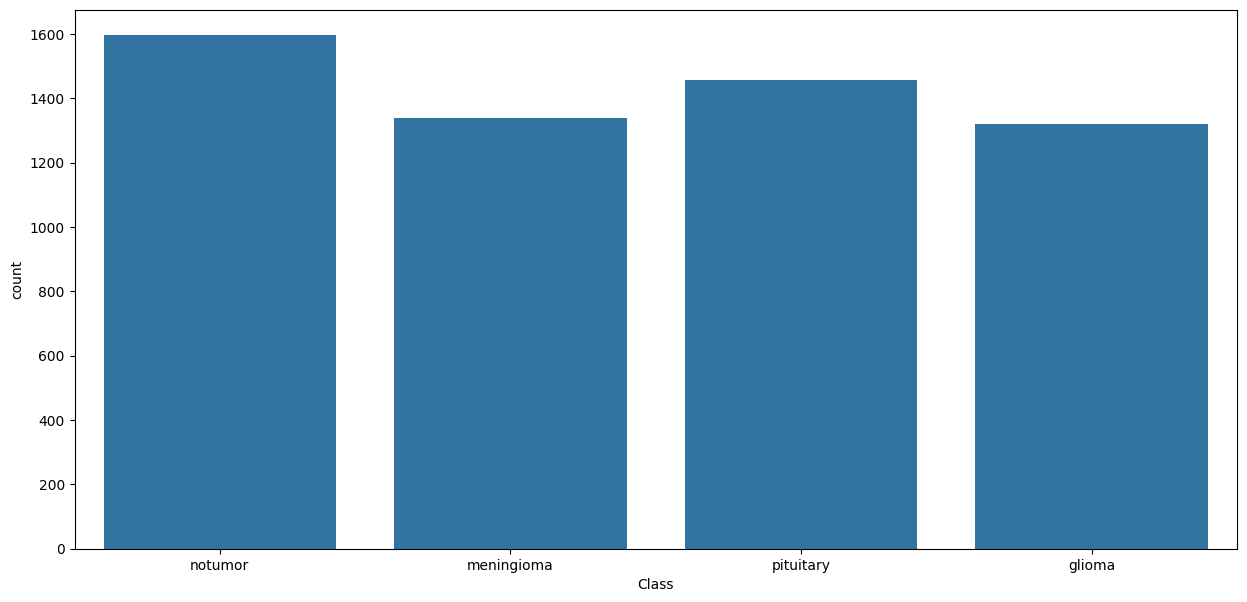

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

Testing data set count

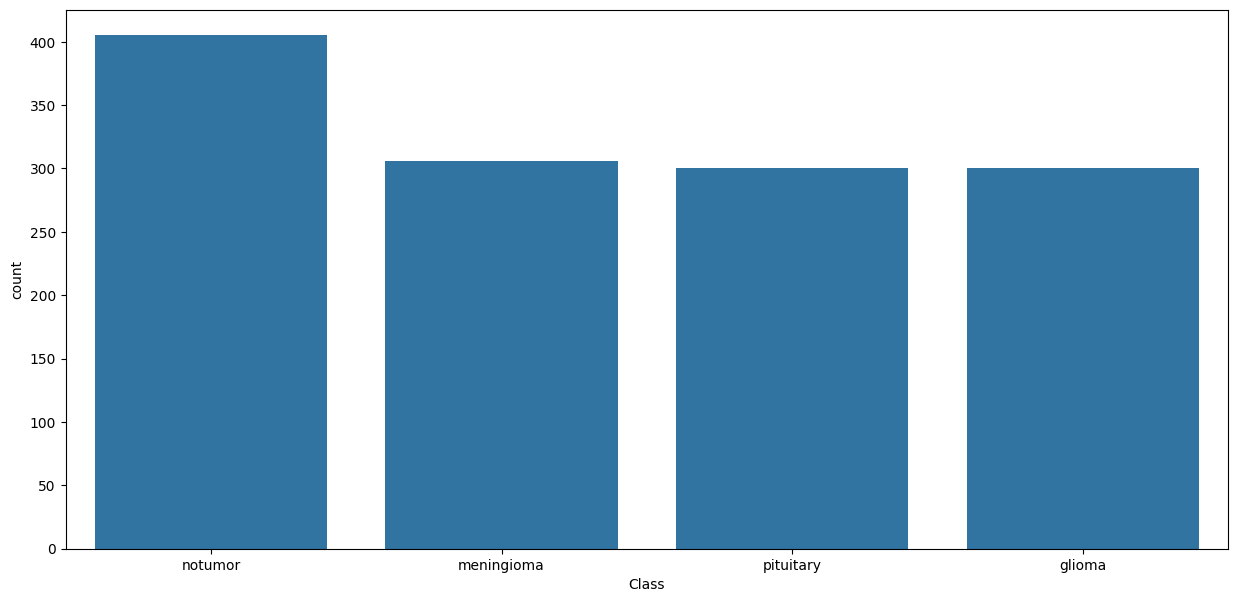

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential #neural network model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Spliting dataset for test and valication

In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.8, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
1270,/content/Testing/glioma/Te-gl_0076.jpg,glioma
583,/content/Testing/meningioma/Te-me_0109.jpg,meningioma
93,/content/Testing/notumor/Te-no_0128.jpg,notumor
543,/content/Testing/meningioma/Te-me_0264.jpg,meningioma
21,/content/Testing/notumor/Te-no_0155.jpg,notumor
...,...,...
1216,/content/Testing/glioma/Te-gl_0157.jpg,glioma
1005,/content/Testing/pituitary/Te-pi_0123.jpg,pituitary
327,/content/Testing/notumor/Te-no_0088.jpg,notumor
362,/content/Testing/notumor/Te-no_0219.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
356,/content/Testing/notumor/Te-no_0370.jpg,notumor
989,/content/Testing/pituitary/Te-pi_0266.jpg,pituitary
199,/content/Testing/notumor/Te-no_0063.jpg,notumor
1116,/content/Testing/glioma/Te-gl_0081.jpg,glioma
565,/content/Testing/meningioma/Te-me_0289.jpg,meningioma
...,...,...
208,/content/Testing/notumor/Te-no_0287.jpg,notumor
1141,/content/Testing/glioma/Te-gl_0082.jpg,glioma
523,/content/Testing/meningioma/Te-me_0147.jpg,meningioma
351,/content/Testing/notumor/Te-no_0191.jpg,notumor


test different batch sizes 16,32,64,128

In [ ]:
batch_size = 64

#resize images to same size
img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

Create 3 different flows training, validation, testing

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = 16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 262 validated image filenames belonging to 4 classes.
Found 1049 validated image filenames belonging to 4 classes.


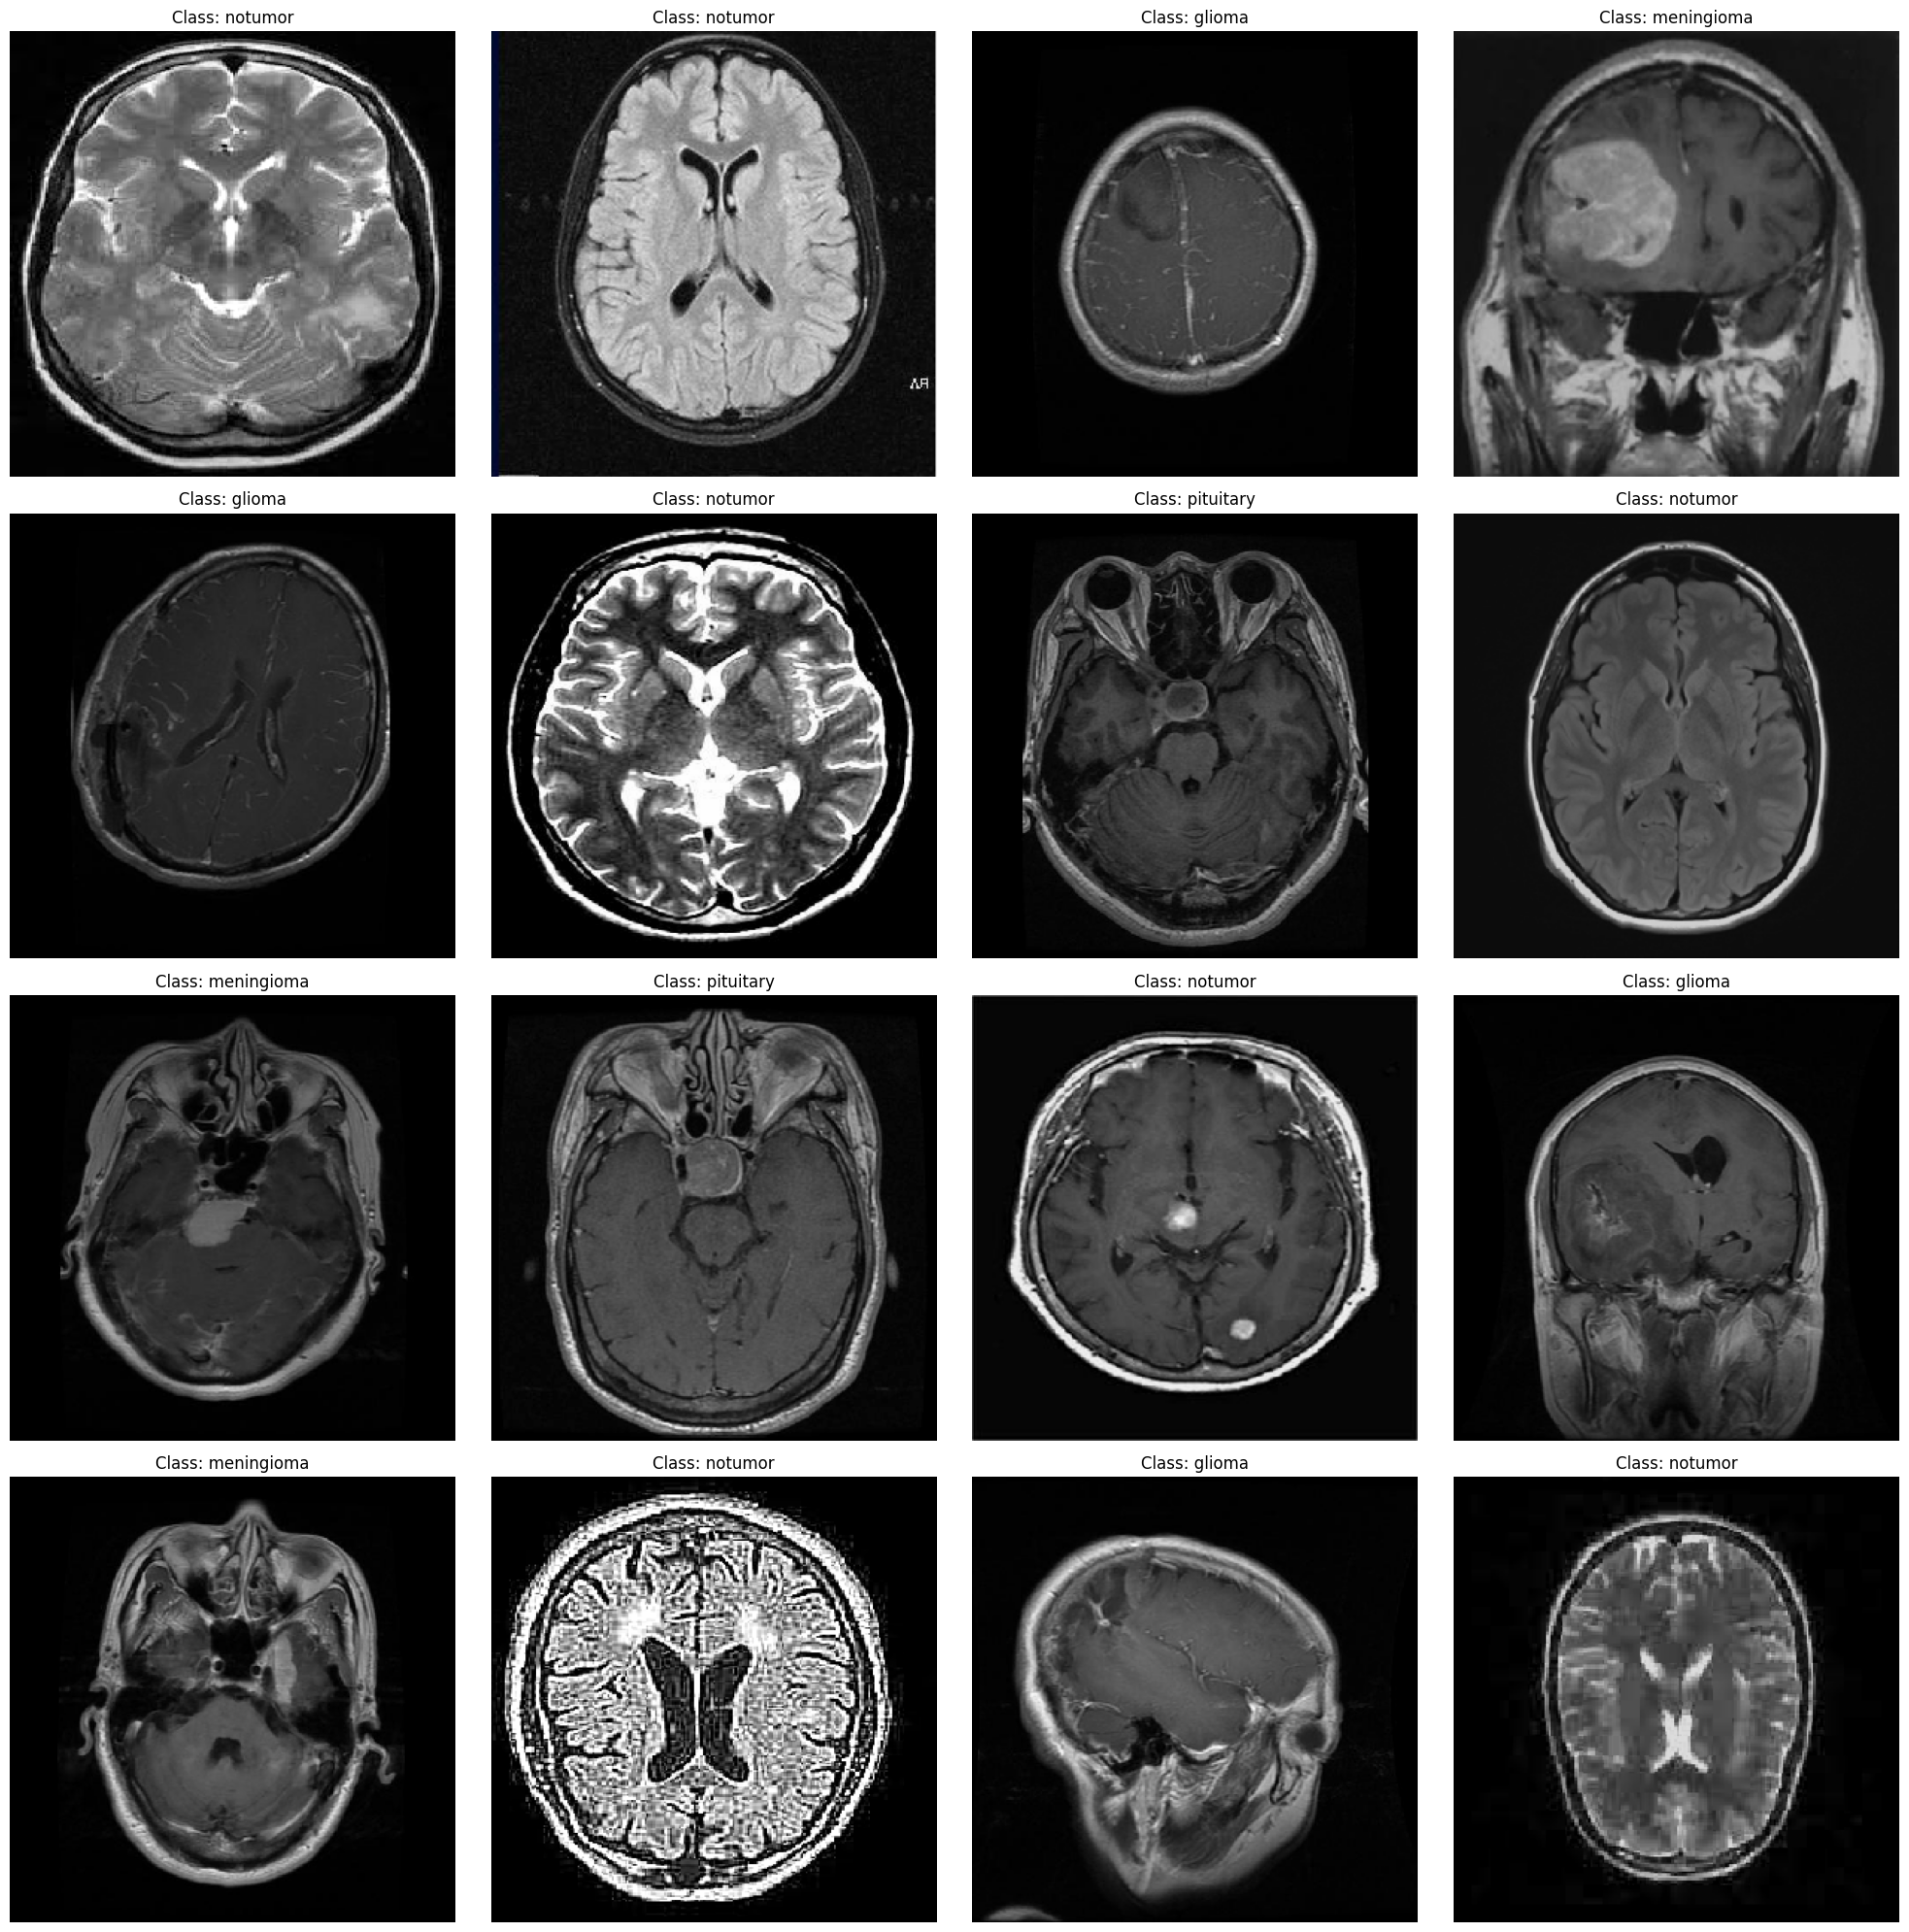

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception (include_top= False,
                                             weights= "imagenet",
                                             input_shape= img_shape,
                                             pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7042 - loss: 0.9017 - precision: 0.7998 - recall: 0.5490 - val_accuracy: 0.8092 - val_loss: 0.6939 - val_precision: 0.8147 - val_recall: 0.8053
Epoch 2/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9778 - loss: 0.0776 - precision: 0.9791 - recall: 0.9771 - val_accuracy: 0.8779 - val_loss: 0.3781 - val_precision: 0.8808 - val_recall: 0.8740
Epoch 3/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9909 - loss: 0.0299 - precision: 0.9910 - recall: 0.9905 - val_accuracy: 0.9046 - val_loss: 0.3415 - val_precision: 0.9109 - val_recall: 0.8969
Epoch 4/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9962 - loss: 0.0168 - precision: 0.9962 - recall: 0.9962 - val_accuracy: 0.9580 - val_loss: 0.1902 - val_precision: 0.9580 - val_recall: 0.9580
Epoch 5/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9991 - loss: 0.0057 - precision: 0.9991 - recall: 0.9979 - val_accuracy: 0.9771 - val_loss: 0.0792 - val_precision

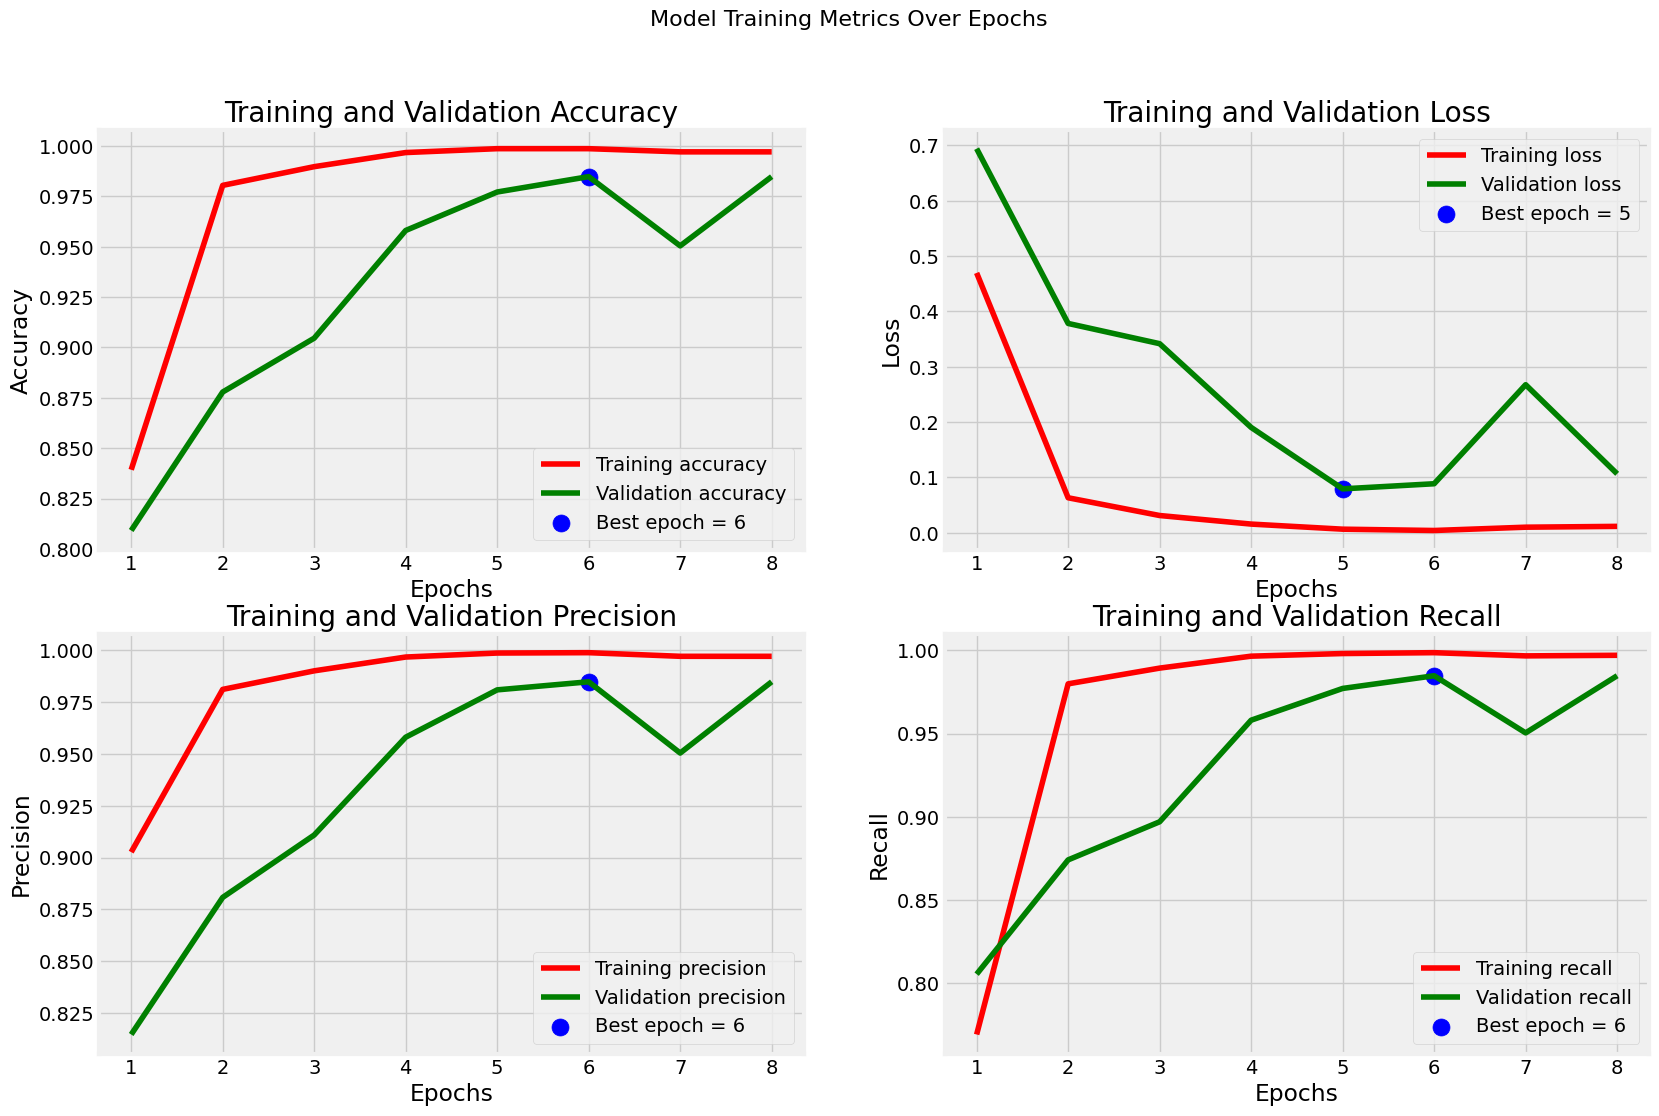

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history [m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin (val_metrics [m])
  else:
    idx = np.argmax (val_metrics [m])
  best_epochs [m] = idx + 1
  best_values [m] = val_metrics [m] [idx]
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range (1, len(tr_metrics [metric]) + 1)

  plt.plot(epochs, tr_metrics [metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics [metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs [metric], best_values [metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs [metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle( 'Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test loss: {test_score[0]:.4f}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 537ms/step - accuracy: 0.9971 - loss: 0.0073 - precision: 0.9971 - recall: 0.9971
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.9849 - loss: 0.0851 - precision: 0.9849 - recall: 0.9849
 1/66 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 1.0000 - loss: 5.1157e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.9883 - loss: 0.0573 - precision: 0.9883 - recall: 0.9880
Train Accuracy: 99.77%
Train loss: 0.0059


Validation Accuracy: 98.47%
Validation loss: 0.1063


Test Accuracy: 98.76%
Test loss: 0.0588


Confusion matricx

66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step


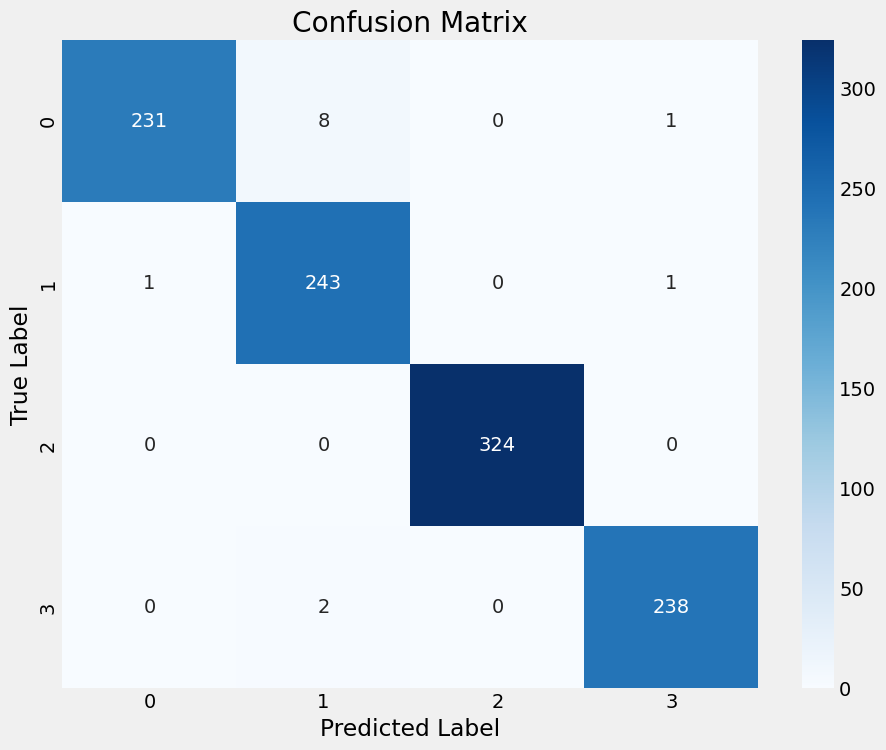

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims (img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions [0])

  # Get predicted class
  predicted_class_idx = np.argmax (probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh (labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()
  print (f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


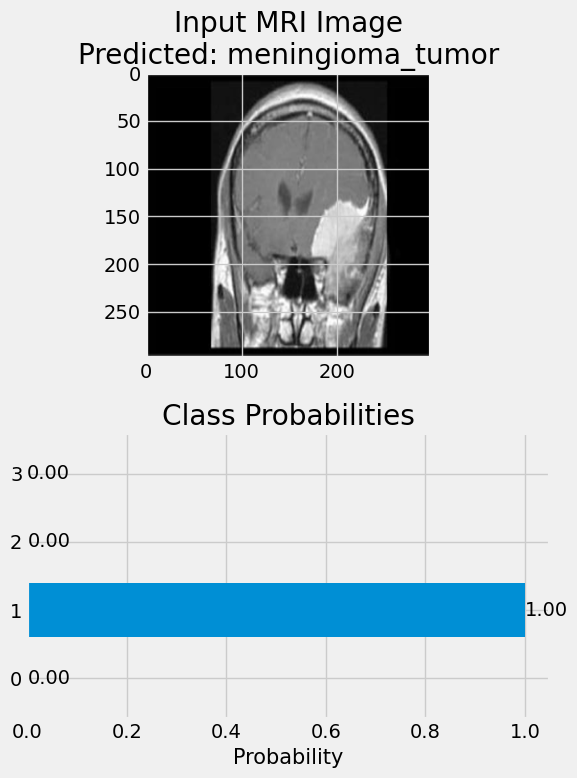


Predicted tumor type: meningioma_tumor


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


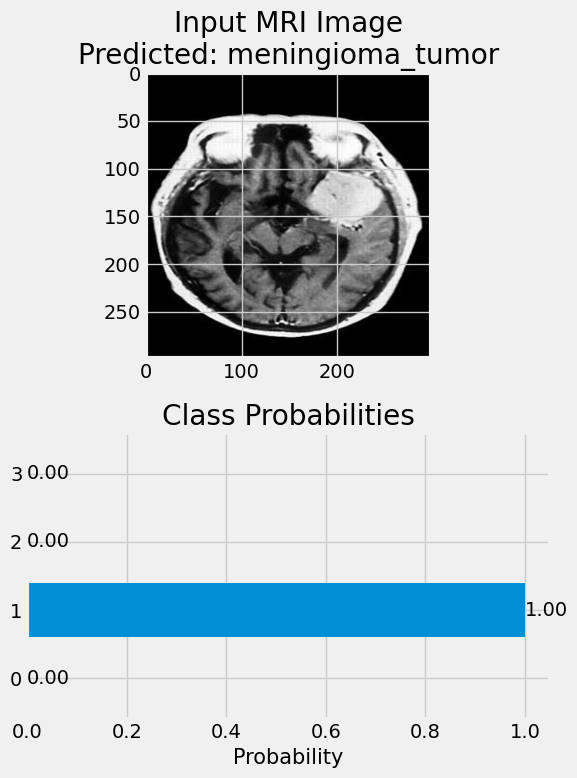


Predicted tumor type: meningioma_tumor


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

### Custom CNN Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 32 # Changed batch size from 16 to 64
img_size = (224, 224)

image_generator = ImageDataGenerator (rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator (rescale=1/255)

tr_gen = image_generator.flow_from_dataframe (tr_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size=batch_size,
                                              target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                               y_col='Class',
                                               batch_size=batch_size,
                                               target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe (ts_df, x_col='Class Path',
                                   y_col='Class',
                                   batch_size=16,
                                   target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 262 validated image filenames belonging to 4 classes.
Found 1049 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense (256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout (0.35))

cnn_model.add(Dense (4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax (learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(),Recall()])

 # Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

#Train the model for longer

In [ ]:
history = cnn_model.fit(tr_gen, epochs=12, validation_data=valid_gen)

Epoch 1/12
  2/179 ━━━━━━━━━━━━━━━━━━━━ 1:34 533ms/step - accuracy: 0.9688 - loss: 0.2143 - precision_2: 0.9688 - recall_2: 0.9688

KeyboardInterrupt: 

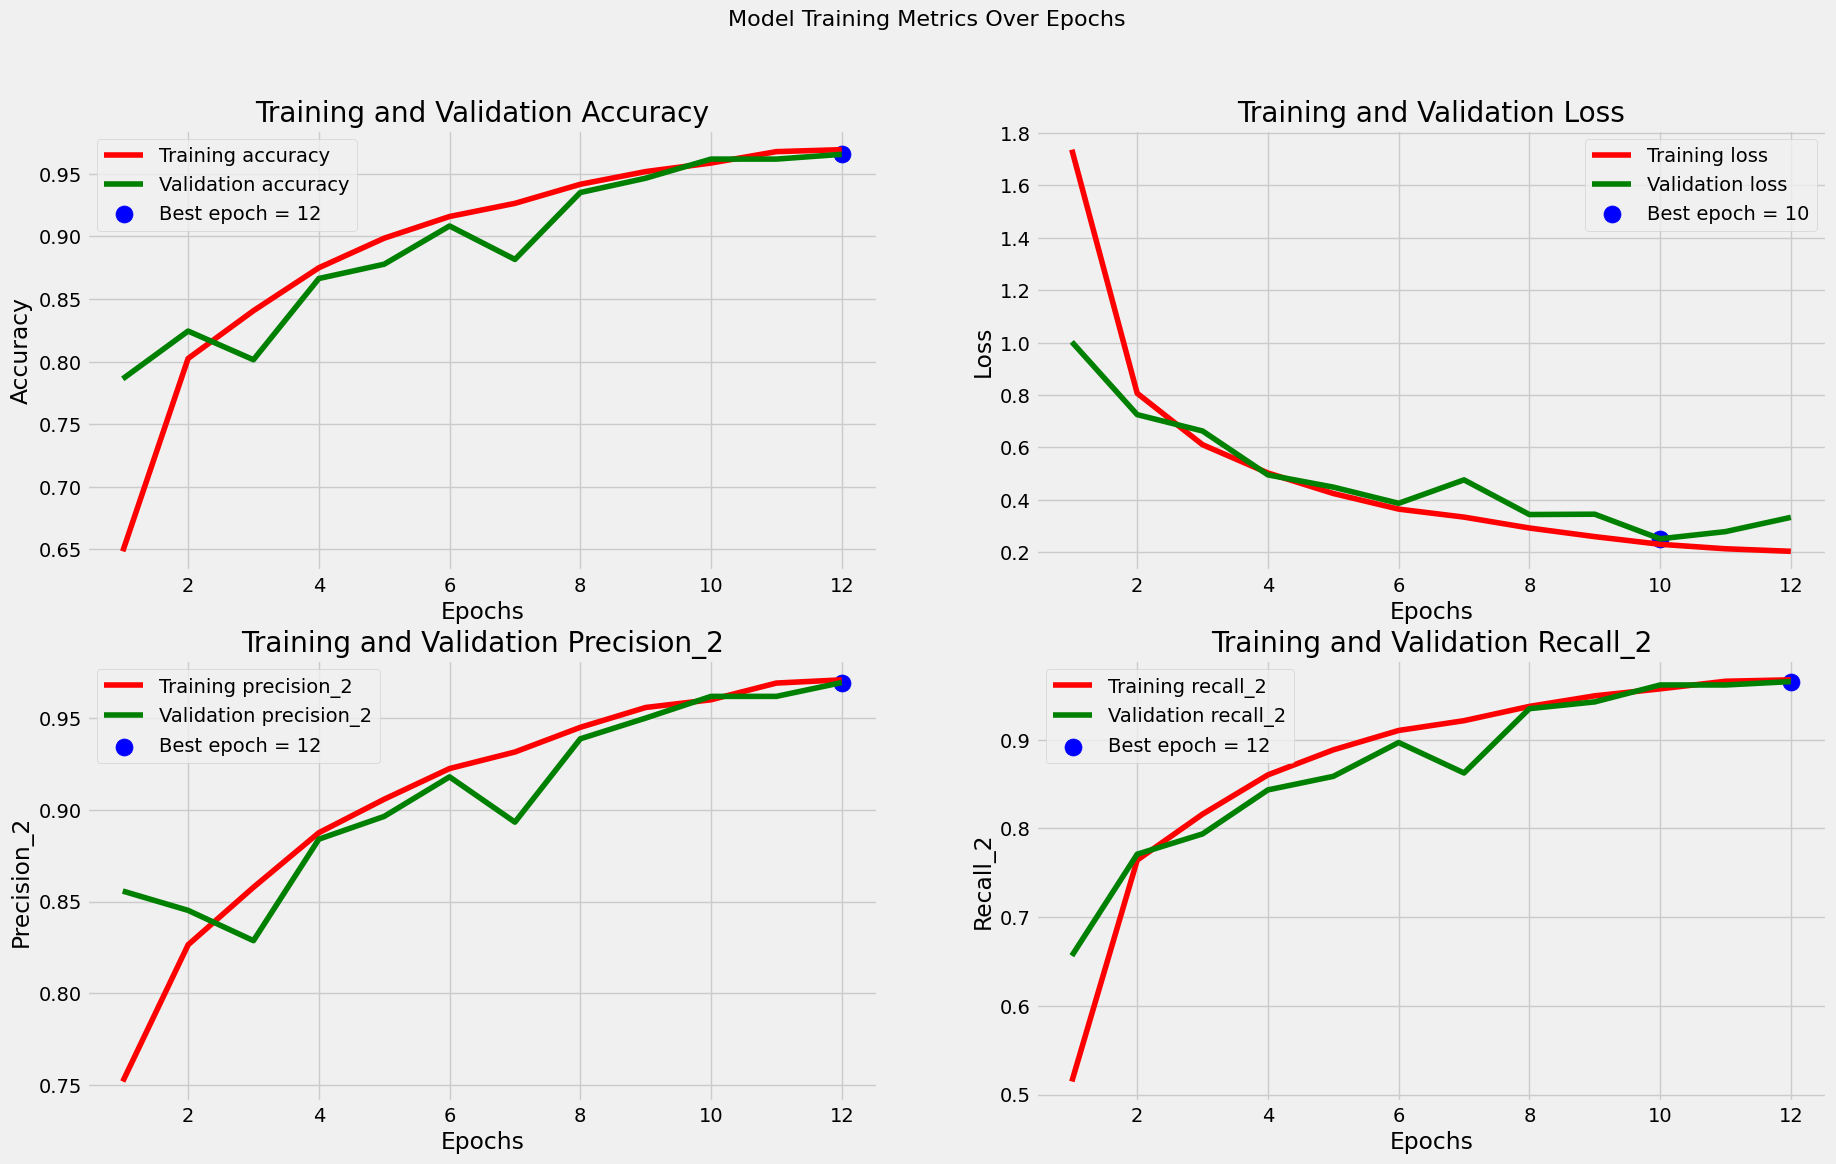

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_2', 'recall_2']
tr_metrics = {m: history.history [m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin (val_metrics [m])
  else:
    idx = np.argmax (val_metrics [m])
  best_epochs [m] = idx + 1
  best_values [m] = val_metrics [m] [idx]
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range (1, len(tr_metrics [metric]) + 1)

  plt.plot(epochs, tr_metrics [metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics [metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs [metric], best_values [metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs [metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle( 'Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9919 - loss: 0.1471 - precision_2: 0.9920 - recall_2: 0.9917
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9694 - loss: 0.2670 - precision_2: 0.9693 - recall_2: 0.9651
 2/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 1.0000 - loss: 0.1422 - precision_2: 1.0000 - recall_2: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.9680 - loss: 0.2272 - precision_2: 0.9680 - recall_2: 0.9679
Train Accuracy: 99.23%
Train loss: 0.1455


Validation Accuracy: 96.95%
Validation loss: 0.3364


Test Accuracy: 96.38%
Test loss: 0.2369


#show confusion matrix

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step


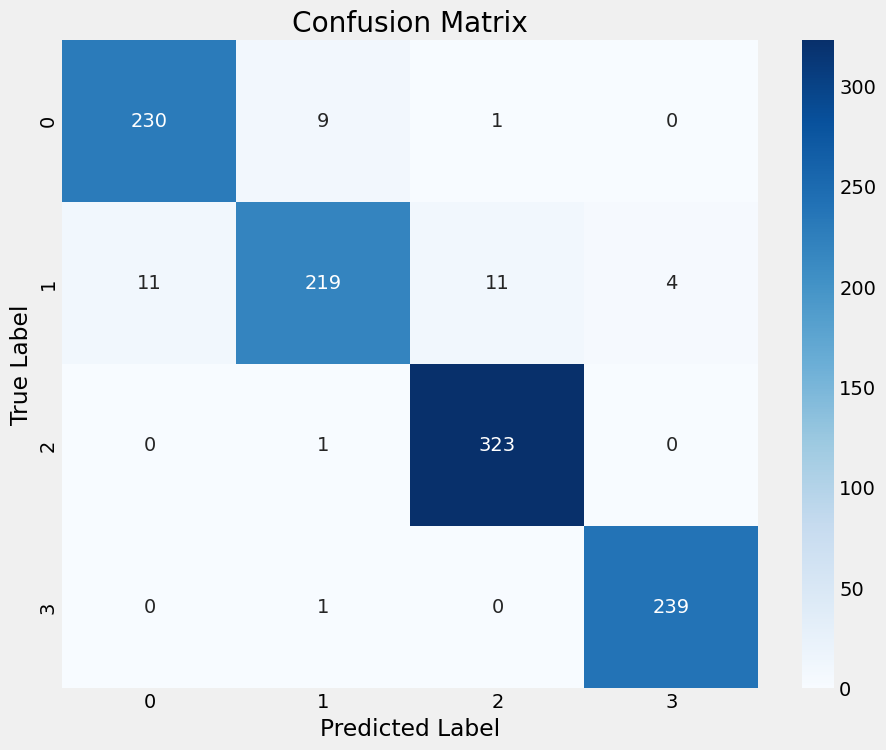

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       240
           1       0.95      0.89      0.92       245
           2       0.96      1.00      0.98       324
           3       0.98      1.00      0.99       240

    accuracy                           0.96      1049
   macro avg       0.96      0.96      0.96      1049
weighted avg       0.96      0.96      0.96      1049



In [ ]:
cnn_model.save("cnn_model.h5")

###Part 2: Streamlit web app

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

import plotly.express as px
import pandas as pd

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

#-------------FUNCTION FOR THE AI PROMPT-----------
def generate_explanation(img_path, model_prediction, confidence) :

    prompt = f"""You are a neurologist specializing in brain imaging and machine learning. Describe the highlighted regions in light cyan on a brain tumor MRI saliency map created by a deep learning model. This model classifies tumors as glioma, meningioma, pituitary, or no tumor, and it has classified this scan as '{model_prediction}' with {confidence * 100}% confidence.

                In your response:

                Describe which brain regions the model focuses on for its classification, based on the cyan-highlighted areas.
                Explain possible reasons for the model’s prediction.
                Use simple language, and limit the explanation to 5 sentences.
                    """
    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model. generate_content ( [prompt, img] )
    return response.text


def generate_response_for_patient(img_path, model_prediction, confidence) :

    prompt = f"""You are a compassionate neurologist explaining a medical image to a patient. The image is from a machine learning model that analyzed their brain MRI scan. This model highlights areas in light cyan where it focused to predict the presence of a brain tumor. It predicted the tumor type as '{model_prediction}' with {confidence * 100}% confidence.

                In your response:

                Explain what the highlighted areas mean in simple words.
                Describe why the model made its prediction, avoiding medical jargon.
                Keep your explanation clear and reassuring, and limit it to five sentences.
                    """
    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model. generate_content ( [prompt, img] )
    return response.text
#-------------END OF AI PROMPT---------------



#--------SALIENCY MAP---------------
def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]



    gradients = tape. gradient (target_class, img_tensor)
    gradients = tf.math.abs (gradients)
    gradients = tf. reduce_max (gradients, axis =- 1)
    gradients = gradients. numpy ( ) . squeeze()

    # Resize gradients to match original image size
    gradients = cv2. resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape [0] // 2, gradients. shape[1] // 2)
    radius = min (center [0], center [1] ) - 10
    y, x = np. ogrid [ : gradients. shape [0], : gradients. shape [1] ]
    mask = (x- center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients [mask]
    if brain_gradients.max() > brain_gradients.min() :
        brain_gradients = (brain_gradients - brain_gradients.min( ) ) / (brain_gradients.max( ) - brain_gradients.min( ))
    gradients [mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients [mask], 80)
    gradients [gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2. GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2. applyColorMap(np.uint8(255 * gradients), cv2. COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2. resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image. img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file. name)
    with open(img_path, "wb") as f:
        f. write (uploaded_file. getbuffer ( ) )

    saliency_map_path = f'saliency_maps/{uploaded_file. name}'

    # Save the saliency map
    cv2. imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
    return superimposed_img
#-----------END OF SALIENCY MAP ----------


#-----------LOAD THE XCEPTION MODEL----------
def load_xception_model(model_path):
    img_shape=(299,299,3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy',
                            Precision(),
                            Recall()])
    model.load_weights(model_path)

    return model
#-------------END OF FUNCITON ----------



st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

#create a variable
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg","png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )
    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')  # Load the model using the function
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)


    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size = img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /=255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    # st.write(f"Prediction Class: {result}")
    # st.write("Prediction:")
    # for label, prob in zip(labels, prediction[0]):
    #     st.write(f"{label}: {prob:.4f}")


    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width=True)




    # ... (DISPLAY PREDICTION LABEL AND ACCURACY ) ...

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    # Get the prediction accuracy
    accuracy = np.max(prediction[0])

    # Get the tumor name
    tumor_name = labels[class_index]

    # CSS to style the metric box
    st.markdown(
        """
        <style>
        div[data-testid="stMetricValue"] {
            background-color: green;
            border-radius: 5px;
            padding: 10px;
        }
        </style>
        """,
        unsafe_allow_html=True,
)

    # Display prediction, accuracy, and tumor name in columns
    col1, col2= st.columns(2)
    with col1:
        st.metric(label="Prediction", value=tumor_name)
    with col2:
        st.metric(label="Confidence", value=f"{accuracy:.4f}")

    # ... (end of display) ...




    #.......... BAR CHART ...........

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[ : :- 1]
    sorted_labels = [labels [i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]
    # Create apPlotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h' ,
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout (
        title='Probabilities for each class',
        xaxis_title='Probability' ,
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict (autorange="reversed")
    )
    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )
    # Display the Plotly chart
    st. plotly_chart (fig)

    #------------END OF BAR CHART----------



    saliency_maps_path = f'saliency_maps/{uploaded_file.name}'
    explanation= generate_explanation(saliency_maps_path, result, prediction[0][class_index])
    st.write("## Explanation:")
    st.write(explanation)

    explanation_for_patient= generate_response_for_patient(saliency_maps_path, result, prediction[0][class_index])
    st.write("## Explanation for a patient:")
    st.write(explanation_for_patient)


Overwriting app.py


In [ ]:
# !pkill ngrok
# ngrok.set_auth_token(ngrok_token)

# # Start the Streamlit server in a separate thread
# thread = Thread(target=run_streamlit)
# thread.start()

In [ ]:
# %%writefile .env

# GOOGLE_API_KEY =

Writing .env


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://331f-34-19-22-25.ngrok-free.app" -> "http://localhost:8501"


Run only if the tunnel is not able to run

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Clossing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

In [ ]:
print("End of model")
print("End of model")